In [1]:
# 필요한 라이브러리 호출
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 파일 불러오기를 위한 Path 설정 (데이터를 불러오는 경로를 개인별로 설정)
path = '../dataset/'

## 데이터 URL
https://www.data.go.kr/data/15070037/fileData.do

### 설명
- 강원도내에서 발생한 5대범죄 발생 및 검거 현황을 연도별로 제공하는 데이터입니다.(2014-2019)
- 살인/강도/강간/절도/폭력 사건에 대해 발생건수와 검거건수를 제공합니다.

In [3]:
# CSV 파일로 불러오기
data = pd.read_csv(f'{path}경찰청 강원도경찰청_5대범죄 발생 및 검거 현황_20191231.csv')
data

,년도,발생,검거,검거율,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,2019,13859,11597,83.7,22,21,25,26,689,650,4675,3155,8448,7745
1,2018,14094,11980,85.0,25,24,16,16,699,665,4300,3048,9054,8227
2,2017,16187,13540,83.6,32,32,27,26,627,591,5248,3628,10253,9263
3,2016,16678,14037,84.2,28,29,28,29,603,570,5166,3568,10853,9841
4,2015,16441,13020,79.2,33,31,35,35,577,544,5966,3740,9830,8670
5,2014,16487,12004,72.8,25,24,56,55,582,560,6203,2988,9621,8377


In [4]:
# excel 파일로 불러오기
data = pd.read_excel(f'{path}경찰청 강원도경찰청_5대범죄 발생 및 검거 현황_20191231.xlsx')
data

,년도,발생,검거,검거율,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,2019,13859,11597,83.7,22,21,25,26,689,650,4675,3155,8448,7745
1,2018,14094,11980,85.0,25,24,16,16,699,665,4300,3048,9054,8227
2,2017,16187,13540,83.6,32,32,27,26,627,591,5248,3628,10253,9263
3,2016,16678,14037,84.2,28,29,28,29,603,570,5166,3568,10853,9841
4,2015,16441,13020,79.2,33,31,35,35,577,544,5966,3740,9830,8670
5,2014,16487,12004,72.8,25,24,56,55,582,560,6203,2988,9621,8377


# 중심도 이해


0    83.7
1    85.0
2    83.6
3    84.2
4    79.2
5    72.8
Name: 검거율, dtype: float64


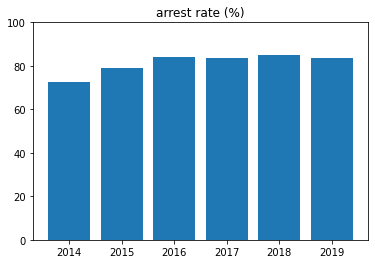

In [79]:
# 데이터 보기

print(data['검거율'])

plt.bar(x = data['년도'], height = data['검거율'])
plt.ylim(0,100)
plt.title('arrest rate (%)')
plt.show()

### 평균값

#### 1. 산술평균

In [13]:
# 데이터의 평균값을 도출해보기 (전체 합 / 전체 데이터 개수)

print(data['검거율'].sum()/len(data['검거율']))

print(data['검거율'].mean())

# 만약, 소수점 2째 자리까지만 출력하는 경우 (round 반올림 함수 이용)

print(round(data['검거율'].mean(), 2))

81.41666666666667
81.41666666666667
81.42


In [11]:
# 평균값 도출을 위한 함수입니다.
def mean(data, column_name):
    print(f'해당 데이터의 컬럼 중 {column_name}의 평균값(mean)은 {data[column_name].mean()} 입니다.')

mean(data, '검거율')

해당 데이터의 컬럼 중 검거율의 평균값(mean)은 81.41666666666667 입니다.


#### 2. 기하평균

In [86]:
# 변수 설정
tem_data = data['검거율'].tolist()
mulScores = 1 # 곱셈에 대한 항등원 1

# 항목들로 반복 (tem_data의 모든 항목을 곱셈하기 위한 코드)
for item in tem_data:
    mulScores *= item
print(f'{tem_data} 내의 모든 값을 곱하면 {mulScores}가 됩니다.')    

# 제곱 연산자 '**'로 기하평균을 도츌합니다.
geometricMean1 = mulScores ** (1/len(tem_data)) 
print(f'해당 데이터의 기하평균 값은 {geometricMean1} 입니다.')

[83.7, 85.0, 83.6, 84.2, 79.2, 72.8] 내의 모든 값을 곱하면 288748218581.22235가 됩니다.
해당 데이터의 기하평균 값은 81.29925245027714 입니다.


#### 3. 가중평균

0    13859
1    14094
2    16187
3    16678
4    16441
5    16487
Name: 발생, dtype: int64


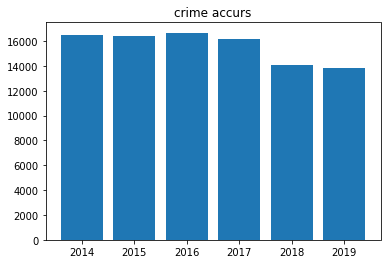

In [8]:
# 데이터 보기

print(data['발생'])

plt.bar(x = data['년도'], height = data['발생'])
plt.title('crime accurs')
plt.show()

In [101]:
# 가중치는 범죄 발생으로 설정하고 검거율의 가중평균을 시행해봅니다.

print('가중치 :',data['발생'].tolist())
print('검거율 :',data['검거율'].tolist())

weight = data['발생']
tem_data = data['검거율']

print('검거율의 범죄 발생에 대한 가중평균 값 :', sum(tem_data * weight)/sum(weight))

가중치 : [13859, 14094, 16187, 16678, 16441, 16487]
검거율 : [83.7, 85.0, 83.6, 84.2, 79.2, 72.8]
검거율의 범죄 발생에 대한 가중평균 값 : 81.26095940093444


#### 4. 절사평균

In [105]:
# 인덱스 슬라이싱을 적용하여 tem_data 내에서 절사 시행

# 변수 설정
cut = 0.15
n = len(data)
tem_data = data['검거율']
cut_data = round(n * cut)

# 인덱싱 데이터 출력
print(f'{cut*100}% 비율로 절사한 후 data는 {tem_data[cut_data : -cut_data].tolist()}입니다.')

# 인덱싱 후 데이터의 평균 출력
print(f'{cut*100}% 비율로 절사한 후 data의 평균은 {tem_data[cut_data : -cut_data].mean()}입니다.')

15.0% 비율로 절사한 후 data는 [85.0, 83.6, 84.2, 79.2]입니다.
15.0% 비율로 절사한 후 data의 평균은 83.0입니다.


### 중위값 도출

In [106]:
# 데이터 보기

print(data['검거율'])

0    83.7
1    85.0
2    83.6
3    84.2
4    79.2
5    72.8
Name: 검거율, dtype: float64


In [53]:
# 하나씩 실행해보는 부분

# 오름차순으로 정렬한 검거율 데이터를 따로 형성
tem_data = sorted(data['검거율'])
print(tem_data)

# 검거율 데이터의 길이를 2로 나눈 몫을 출력
center = len(tem_data) // 2
print(center)

# 인덱스로 접근하여 tem_data의 3번째 값과 -4번째 (= 2번째) 값을 더한 후 2로 나눠준다.
# 참고로 인덱스는 0부터 시작한다.
print((tem_data[center] + tem_data[-center - 1])/2)

[72.8, 79.2, 83.6, 83.7, 84.2, 85.0]
3
83.65


In [107]:
# 중위값(median) 도출을 위한 함수입니다. (파이썬 함수를 활용한 중위값 출력 부분)
def mean(data = data, column_name = '발생'):
    print(f'해당 데이터의 컬럼 중 {column_name}의 중위값(median)은 {data[column_name].median()} 입니다.')
    
mean(data, '검거율')

해당 데이터의 컬럼 중 검거율의 중위값(median)은 83.65 입니다.
